In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;

sns.set()

Randomly generate 100 points belonging to two 2D Gaussian, plot the points.

Text(0.5, 1.0, 'Naive Bayes Model')

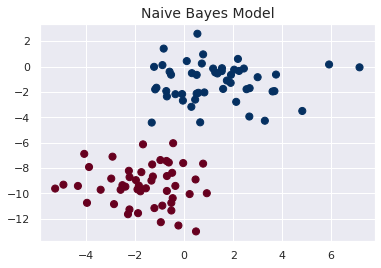

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

TODO - Fit the data X to 2 Gaussians using sklearn.mixture.GaussianMixture. Print the calculated means and covariances.

In [4]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
model.fit(X, y)

mu = model.means_
cov = model.covariances_

print("Mean: ", mu, ", covariance: ", cov)

Mean:  [[ 1.30227383 -1.23165348]
 [-1.64818873 -9.35021545]] , covariance:  [[[ 3.31897972 -0.01380686]
  [-0.01380686  2.20992289]]

 [[ 2.05509959 -0.17207709]
  [-0.17207709  2.56629724]]]


Generate randomly 20 test points (uniformly, independently of Gaussians)




In [10]:
# Pseudo-random generator
rng = np.random.RandomState()

In [11]:
Xnew = rng.rand(20, 2)

# Move and spread out the points
Xnew *= np.array([14,19])
Xnew += np.array([-6,-15])
Xnew

array([[ -0.77813521,  -1.71556045],
       [  6.90770765,   1.18408065],
       [  7.45528925, -13.93988495],
       [  6.0704738 ,  -2.71211143],
       [  7.99959285, -11.269502  ],
       [  6.48803302, -10.62703976],
       [  0.8933336 ,  -7.70566602],
       [  5.92413917, -11.17540122],
       [  2.64359882, -10.74501197],
       [  6.55166547,  -2.58987901],
       [ -5.50009963,  -0.18822223],
       [  1.70558233,   3.66206996],
       [ -1.1789549 ,  -0.53885235],
       [ -2.11534262,  -0.65487812],
       [  7.86804531,  -0.14147526],
       [ -3.87827815,  -4.27675231],
       [ -5.80338936, -11.34184983],
       [ -0.5686704 ,  -6.88887   ],
       [ -2.7807588 ,  -8.80321484],
       [ -2.97761676,  -5.2235652 ]])

TODO - Predict to which Gaussian each test point belongs, print the predictions.




In [12]:
ynew = model.predict(Xnew)
ynew

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

Make the contour plot of the Gaussian model based on calculated parameteres. Add test samples to the plot.

[(-15.0, 5.0), (-8.0, 8.0)]

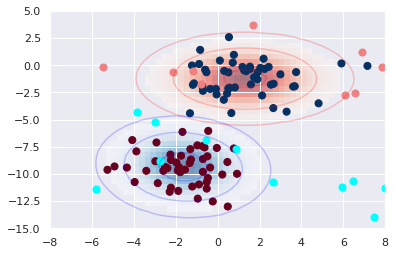

In [13]:
def gaussian(X, mu, cov):
    P = np.zeros((X.shape[0],), dtype=float)
    N = (1. / (np.sqrt((2 * np.pi)**2 * np.linalg.det(cov))))
    for c, x in enumerate(X):
      x_m = (x - mu)
      P[c] = N * np.exp(-0.5 * (x_m.T @ np.linalg.inv(cov) @ x_m))
    return P

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

fig, ax = plt.subplots()
# Plot original data
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
# Contour plot of the model
for label, color in enumerate(['red', 'blue']):
    P = gaussian(Xgrid, mu[label], cov[label])
    Pm = np.ma.masked_array(P, P < 0.002)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.001, 0.01, 0.05, 0.09],
               colors=color, alpha=0.2)
    
# Adding test predictions    
for label, color in enumerate(['lightcoral', 'aqua']): 
    mask = (ynew == label)
    Xnew_ = Xnew[mask]
    ax.scatter(Xnew_[:, 0], Xnew_[:, 1], c=color, s=50)
ax.set(xlim=xlim, ylim=ylim)